In [1]:
import pandas as pd
import numpy as np
path = r'C:\Users\steph\bepec\Machine Learning\Stream Lit\automobile_pricing_predictor\data\clean_auto_price.csv'

In [2]:
auto_price = pd.read_csv(path)
auto_price.head(5)

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,13495.0,11.190476,8.703704,low,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,16500.0,11.190476,8.703704,low,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,19,26,16500.0,12.368421,9.038462,medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,24,30,13950.0,9.791667,7.833333,low,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,18,22,17450.0,13.055556,10.681818,low,0,1,1,0


In [3]:
del auto_price["Unnamed: 0"]

In [4]:
auto_price.head(5)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,low,0,1,1,0


## Analyzing Individual Feature Patterns using Visualization
### To install seaborn use the pip which is the python package manager.

### Import visualization packages "Matplotlib" and "Seaborn", don't forget about "%matplotlib inline" to plot in a Jupyter notebook.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
auto_price.dtypes

symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
highway-L/100km      float64
horsepower-binned     object
diesel                 int64
gas                    int64
aspiration-std         int64
aspiration-turbo       int64
dtype: object

In [7]:
auto_price.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


In [8]:
auto_price[["bore","stroke","compression-ratio","horsepower"]].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


## Continuous numerical variables:
### Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64".

### In order to start understanding the (linear) relationship between an individual variable and the price. This can be done by using "regplot" which plots the scatterplot plus the fitted regression line for the data.

## Positive linear relationship
### Scatterplot of "engine-size" and "price"

(0.0, 53163.662274359776)

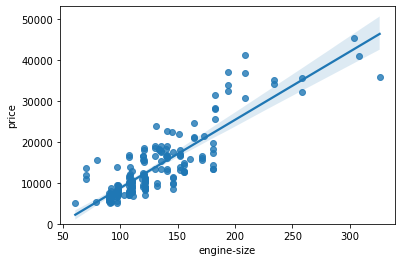

In [9]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=auto_price)
plt.ylim(0,)

### As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

### We can examine the correlation between 'engine-size' and 'price' and see it's approximately 0.87

In [10]:
auto_price[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


(0.0, 48183.49074222177)

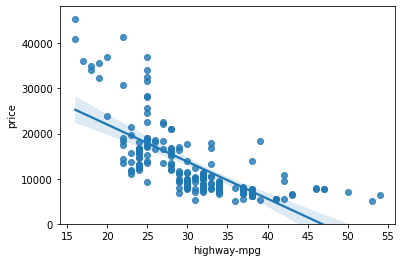

In [11]:
sns.regplot(x="highway-mpg",y="price", data= auto_price)
plt.ylim(0,)

### As the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

### We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately -0.704

In [12]:
auto_price[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


## Weak Linear Relationship
### Let's see if "Peak-rpm" as a predictor variable of "price".

(0.0, 47414.1)

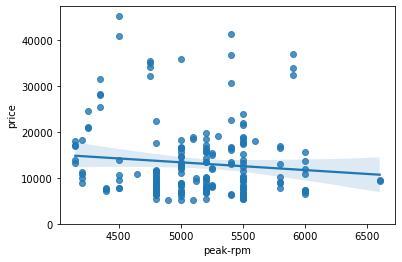

In [13]:
sns.regplot(x="peak-rpm",y="price", data= auto_price)
plt.ylim(0,)

### Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.

### We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616

In [14]:
auto_price[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [15]:
auto_price[["stroke","price"]].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


(0.0, 47414.1)

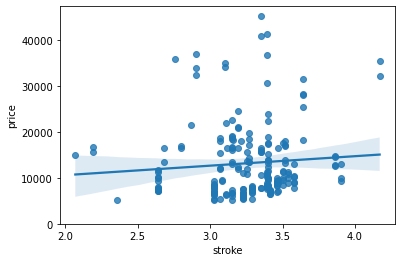

In [16]:
sns.regplot(x="stroke",y="price", data=auto_price)
plt.ylim(0,)

(0.0, 47538.04562586613)

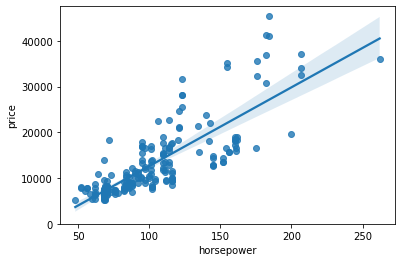

In [17]:
sns.regplot(x="horsepower",y="price", data=auto_price)
plt.ylim(0,)

(0.0, 48236.692876011686)

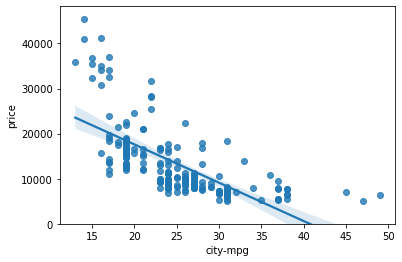

In [18]:
sns.regplot(x="city-mpg",y="price", data=auto_price)
plt.ylim(0,)

(0.0, 47798.38703660264)

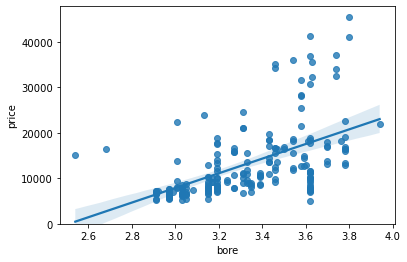

In [19]:
sns.regplot(x="bore",y="price", data=auto_price)
plt.ylim(0,)

(0.0, 47756.40471933787)

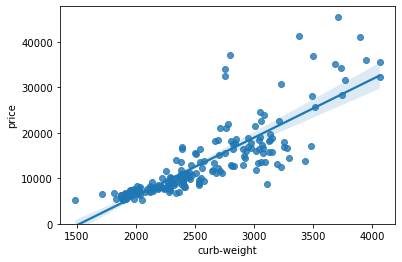

In [20]:
sns.regplot(x="curb-weight",y="price", data=auto_price)
plt.ylim(0,)

## Categorical variables
### These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

### Relationship between "body-style" and "price"

### We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":


<AxesSubplot:xlabel='body-style', ylabel='price'>

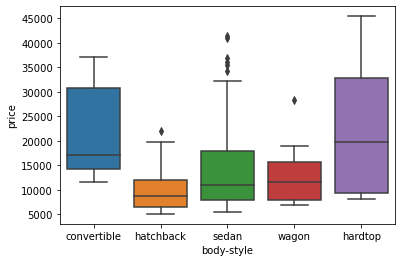

In [21]:
sns.boxplot(x="body-style", y="price", data=auto_price)

### Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

<AxesSubplot:xlabel='engine-location', ylabel='price'>

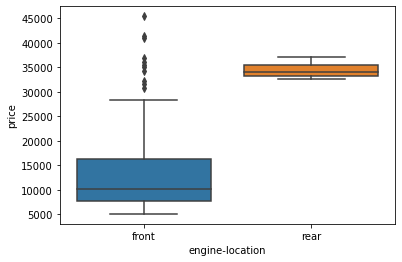

In [22]:
sns.boxplot(x="engine-location", y="price", data=auto_price)

<AxesSubplot:xlabel='num-of-doors', ylabel='price'>

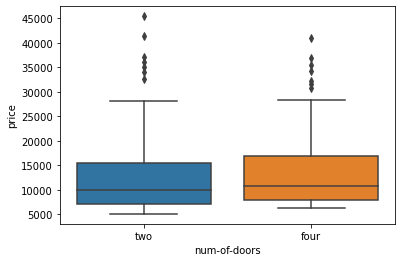

In [23]:
sns.boxplot(x="num-of-doors", y="price", data=auto_price)

<AxesSubplot:xlabel='num-of-cylinders', ylabel='price'>

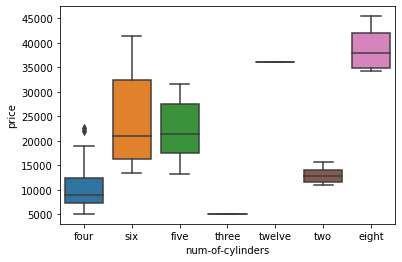

In [24]:
sns.boxplot(x="num-of-cylinders", y="price", data=auto_price)

<AxesSubplot:xlabel='engine-type', ylabel='price'>

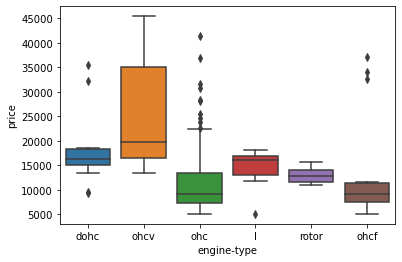

In [25]:
sns.boxplot(x="engine-type", y="price", data=auto_price)

## Descriptive Statistical Analysis
### The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

### This will show:

### the count of that variable
### the mean
### the standard deviation (std)
### the minimum value
### the IQR (Interquartile Range: 25%, 50% and 75%)
### the maximum value

In [26]:
auto_price.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


In [27]:
auto_price.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,low
freq,32,115,94,118,198,145,157,92,153


## Value Counts
### Value-counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column 'drive-wheels'. Don’t forget the method "value_counts" only works on Pandas series, not Pandas Dataframes. As a result, we only include one bracket "df['drive-wheels']" not two brackets "df[['drive-wheels']]".

In [28]:
auto_price["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [29]:
auto_price["drive-wheels"].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [30]:
drive_wheels_counts = auto_price["drive-wheels"].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'})
drive_wheels_counts

,drive-wheels
fwd,118
rwd,75
4wd,8


In [31]:
drive_wheels_counts.index.name = "drive_wheels"
drive_wheels_counts

,drive-wheels
drive_wheels,
fwd,118
rwd,75
4wd,8


### Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

In [32]:
engine_loc_counts = auto_price["engine-location"].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location':'value_counts'}, inplace=True)
engine_loc_counts.index.name = "engine_location"
engine_loc_counts

,value_counts
engine_location,
front,198
rear,3


## Basics of Grouping
### The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.

### For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.

In [33]:
auto_price['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [34]:
auto_price_gp1 = auto_price[['drive-wheels','body-style','price']]

In [35]:
auto_price_gp2 = auto_price_gp1.groupby(['drive-wheels'], as_index=False).mean()

In [36]:
auto_price_gp2

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [37]:
auto_price_gp2 = auto_price[['drive-wheels','body-style','price']]
auto_price_wheels = auto_price_gp2.groupby(['drive-wheels','body-style'], as_index=False).mean()
auto_price_wheels

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [38]:
grouped_var = auto_price_wheels.pivot(index="drive-wheels", columns='body-style')
grouped_var

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

### Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.

In [39]:
grouped_var = grouped_var.fillna(0)
grouped_var

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [40]:
# Mean value of body-style

gp_test4 = auto_price[['body-style','price']]
gp_test_body_style = gp_test4.groupby(['body-style'], as_index=False).mean()
gp_test_body_style

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Variables: Drive Wheels and Body Style vs Price
### Let's use a heat map to visualize the relationship between Body Style vs Price.

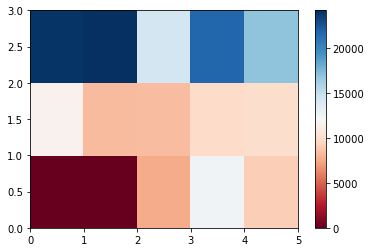

In [42]:
plt.pcolor(grouped_var, cmap='RdBu')
plt.colorbar()
plt.show()

### The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.

### The default labels convey no useful information to us. Let's change that:

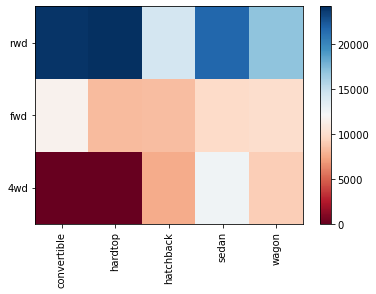

In [43]:
fig, ax = plt.subplots()
im = plt.pcolor(grouped_var, cmap='RdBu')

row_label = grouped_var.columns.levels[1]
column_label = grouped_var.index

#Set the xticks and yticks
ax.set_xticks(np.arange(grouped_var.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_var.shape[0])+0.5, minor=False)

#Set the xticks label and yticks label
ax.set_xticklabels(row_label, minor=False)
ax.set_yticklabels(column_label, minor=False)

#rotate the xticklabel
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### To get a better measure of the important characteristics, we look at the correlation of these variables with the car price, in other words: how is the car price dependent on this variable?

## Correlation and Causation
### Correlation: a measure of the extent of interdependence between variables.

### Causation: the relationship between cause and effect between two variables.

### It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.

### Pearson Correlation</p>

### The Pearson Correlation measures the linear dependence between two variables X and Y.

### The resulting coefficient is a value between -1 and 1 inclusive, where:

### 1: Total positive linear correlation.
### 0: No linear correlation, the two variables most likely do not affect each other.
### -1: Total negative linear correlation.
### Pearson Correlation is the default method of the function "corr". Like before we can calculate the Pearson Correlation of the of the 'int64' or 'float64' variables.

In [44]:
auto_price.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


## P-value:

### What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

### By convention, when the

### p-value is  0.001: we say there is strong evidence that the correlation is significant.
### the p-value is  0.05: there is moderate evidence that the correlation is significant.
### the p-value is  0.1: there is weak evidence that the correlation is significant.
### he p-value is  0.1: there is no evidence that the correlation is significant.
### We can obtain this information using "stats" module in the "scipy" library.

In [45]:
from scipy import stats

### Wheel-base vs Price
### Let's calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.

In [46]:
#Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)
pearson_coeff, p_value = stats.pearsonr(auto_price['wheel-base'], auto_price['price'])
print("Pearson Coefficient : ", pearson_coeff, "Price : ", p_value)

Pearson Coefficient :  0.5846418222655083 Price :  8.076488270732873e-20


### Horsepower vs Price
### Let's calculate the Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'

In [47]:
#Since the p-value is < 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)
pearson_coeff, p_value = stats.pearsonr(auto_price['horsepower'], auto_price['price'])
print("Pearson COefficient : ", pearson_coeff, "P-Value: ",p_value)

Pearson COefficient :  0.8096068016571052 P-Value:  6.273536270650862e-48


### Length vs Price
### Let's calculate the Pearson Correlation Coefficient and P-value of 'length' and 'price

In [48]:
# Since the p-value is  0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).
pearson_coeff, p_value = stats.pearsonr(auto_price['length'], auto_price['price'])
print("Pearson Coefficent : ", pearson_coeff, "P-value : ", p_value)

Pearson Coefficent :  0.6906283804483644 P-value :  8.016477466158188e-30


### Width vs Price
### Let's calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price':

In [49]:
# Since the p-value is  0.001, the correlation between width and price is statistically significant, and the linear relationship is moderately strong (~0.691).
pearson_coeff, p_value = stats.pearsonr(auto_price['width'], auto_price['price'])
print("Pearson Coefficent : ", pearson_coeff, "P-value : ", p_value)

Pearson Coefficent :  0.7512653440522665 P-value :  9.200335510484131e-38


### Curb-weight vs Price
### Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price':

In [50]:
#The Pearson Correlation Coefficient is 0.8344145257702846  with a P-value of P =  2.1895772388936997e-53
pearson_coeff, p_value = stats.pearsonr(auto_price['curb-weight'], auto_price['price'])
print("Pearson COefficient :", pearson_coeff, "P_value:",p_value)

Pearson COefficient : 0.8344145257702849 P_value: 2.1895772388933803e-53


### Engine-size vs Price
### Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price

In [51]:
#Since the p-value is < 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).
pearson_coeff, p_value = stats.pearsonr(auto_price['engine-size'], auto_price['price'])
print("Pearson COefficient :", pearson_coeff, "P_value:",p_value)

Pearson COefficient : 0.8723351674455185 P_value: 9.265491622198389e-64


### Bore vs Price
### Let's calculate the Pearson Correlation Coefficient and P-value of 'bore' and 'price':

In [52]:
#Since the p-value is  0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).
pearson_coeff, p_value = stats.pearsonr(auto_price['bore'], auto_price['price'])
print("Pearson COefficient :", pearson_coeff, "P_value:",p_value)

Pearson COefficient : 0.5431553832626604 P_value: 8.049189483935032e-17


### City-mpg vs Price

In [53]:
#Since the p-value is < 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.
pearson_coeff, p_value = stats.pearsonr(auto_price['city-mpg'], auto_price['price'])
print("Pearson COefficient :", pearson_coeff, "P_value:",p_value)    

Pearson COefficient : -0.6865710067844681 P_value: 2.3211320655673773e-29


### Highway-mpg vs Price

In [54]:
#Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong
pearson_ceoff, p_value = stats.pearsonr(auto_price['highway-mpg'], auto_price['price'])
print("Pearson Coefficient :", pearson_coeff, "P-value : ", p_value)

Pearson Coefficient : -0.6865710067844681 P-value :  1.7495471144474617e-31


## ANOVA
### ANOVA: Analysis of Variance
### The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

### F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

### P-value: P-value tells how statistically significant is our calculated score value.

### If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

### Drive Wheels
### Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

### Let's see if different types 'drive-wheels' impact 'price', we group the data.

In [55]:
auto_price_test = auto_price_gp2[['drive-wheels','price']].groupby(['drive-wheels'])
auto_price_test.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [56]:
auto_price_gp2

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


### We can obtain the values of the method group using the method "get_group".

In [57]:
auto_price_test.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

### we can use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.

In [58]:
f_val, p_val = stats.f_oneway(auto_price_test.get_group('rwd')['price'], auto_price_test.get_group('fwd')['price'], auto_price_test.get_group('4wd')['price'])

In [59]:
print("F-Test Score : ",f_val, "P-Val : ",p_val)

F-Test Score :  67.95406500780398 P-Val :  3.3945443577151245e-23


### his is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

### Separately: fwd and rwd

In [60]:
f_val, p_val = stats.f_oneway(auto_price_test.get_group('fwd')['price'], auto_price_test.get_group('rwd')['price'])
print("F-Test Score : ",f_val,"P-val : ",p_val)

F-Test Score :  130.5533160959111 P-val :  2.2355306355677845e-23


### 4wd and rwd

In [61]:
f_val, p_val = stats.f_oneway(auto_price_test.get_group('4wd')['price'], auto_price_test.get_group('rwd')['price'])
print("F-Test Score : ",f_val,"P-val : ",p_val)

F-Test Score :  8.580681368924756 P-val :  0.004411492211225333


### 4wd and fwd

In [62]:
f_val, p_val = stats.f_oneway(auto_price_test.get_group('4wd')['price'], auto_price_test.get_group('fwd')['price'])
print("F-Test Score : ",f_val,"P-val : ",p_val)

F-Test Score :  0.665465750252303 P-val :  0.41620116697845666


## Conclusion: Important Variables
### We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

### Continuous numerical variables:

#### Length
#### Width
#### Curb-weight
#### Engine-size
#### Horsepower
#### City-mpg
#### Highway-mpg
#### Wheel-base
#### Bore
### Categorical variables:

#### Drive-wheels
### As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.